<a href="https://colab.research.google.com/github/Imran-Github22/Programming-For-Data/blob/main/11_Page_Views_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovery project - page views

### Adapted from freeCodeCamp [project](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

For this project you will visualise data that has values recorded against time.  You will use Pandas and Matplotlib to visualise the dataset which contains the number of page views each day on the freeCodeCamp.org forum between 2016-05-09 and 2019-12-03. You will create a line chart, a bar chart, and some box plots to create visualisations that will help you understand the patterns in visits to the forum and identify growth over various time ranges (yearly, monthly, etc).


The dataset can be read from here: "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv"

Visualise and analyse the data in the following ways:



In [1]:
import pandas as pd
import datetime
url = 'https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/page_views.csv'
def create_dataframe(url):
  df = pd.read_csv(url)
  return df

df = create_dataframe(url)
df.dropna(inplace=True)
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


None

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


### 1.  a line plot, similar to this 
---
![example](https://drive.google.com/uc?id=1Cic5SybYEc86rqbwTCZzyEf4rzQNWJLP) (taken from the freeCodeCamp site) and with similar labelling.

To prepare the data for the line plot you might do the following:  

*  convert the `date` column to **datetime** type 
*  create 3 new columns for `year`, `month` and `day` (use `dt.year, dt.strftime to get the month name, dt.day`)
*  set the index to the **date** column.
*  clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.


In [2]:
from operator import index
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%B')
df['year'] = df['date'].dt.year

df.index = df['date']

#top = int(df['value'].max() * 97.5/100)
#bottom = int(df['value'].min() * 102.5/100)

top = df['value'].quantile(0.975)
bottom = df['value'].quantile(0.025)

df_filtered = df[(df['value'] > bottom) & (df['value'] < top)] 

display(df_filtered.info())
display(df_filtered.head(10))
display(df_filtered.tail(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1238 non-null   datetime64[ns]
 1   value       1238 non-null   int64         
 2   day         1238 non-null   int64         
 3   month       1238 non-null   int64         
 4   month_name  1238 non-null   object        
 5   year        1238 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 67.7+ KB


None

,date,value,day,month,month_name,year
date,,,,,,
2016-05-19,2016-05-19,19736,19,5,May,2016
2016-05-26,2016-05-26,18060,26,5,May,2016
2016-05-27,2016-05-27,19997,27,5,May,2016
2016-05-28,2016-05-28,19044,28,5,May,2016
2016-05-29,2016-05-29,20325,29,5,May,2016
2016-06-07,2016-06-07,18335,7,6,June,2016
2016-06-08,2016-06-08,18072,8,6,June,2016
2016-06-09,2016-06-09,18139,9,6,June,2016
2016-06-14,2016-06-14,19395,14,6,June,2016


,date,value,day,month,month_name,year
date,,,,,,
2019-11-16,2019-11-16,125634,16,11,November,2019
2019-11-17,2019-11-17,131639,17,11,November,2019
2019-11-20,2019-11-20,151733,20,11,November,2019
2019-11-21,2019-11-21,169121,21,11,November,2019
2019-11-23,2019-11-23,146658,23,11,November,2019
2019-11-24,2019-11-24,138875,24,11,November,2019
2019-11-29,2019-11-29,171584,29,11,November,2019
2019-11-30,2019-11-30,141161,30,11,November,2019
2019-12-01,2019-12-01,142918,1,12,December,2019


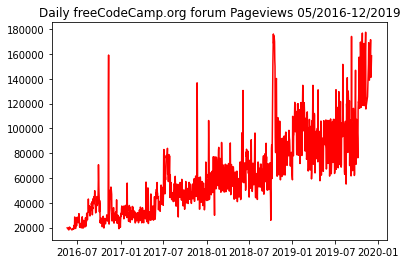

In [3]:
def show_lineplot_pageviews(df):
  import matplotlib.pyplot as plt
  yearly_df = df[['value']]
 
  # Draw the line plot
  plt.plot(yearly_df['value'], color='red')
  plt.title('Daily freeCodeCamp.org forum Pageviews 05/2016-12/2019')
  #plt.grid()
  plt.show()

show_lineplot_pageviews(df_filtered)

###2. a bar chart similar to this 
---

![example](https://drive.google.com/uc?id=15-tIwheaCIcUsx6jfg5DBAWFVGE4bHzK) (taken from the freeCodeCamp site) and with similar labelling.  It should show average daily page views for each month grouped by year. 

To prepare the data for the bar chart you should create a pivot table and can use pivot_table_name.plot(kind='bar')


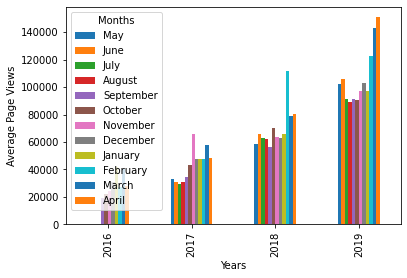

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def create_pivot(df):
  #add code below which creates a pivot table of Pop and State 
  df_pivot = pd.pivot_table(df, values='value', index='year', columns=['month'], aggfunc = np.mean)
  return df_pivot

pivot_df = create_pivot(df_filtered)
#pivot_df.dropna(inplace=True)
def show_barchart_pageviews(df):
  # Draw the bar graph
  df.plot(kind='bar')
  plt.legend(labels=df_filtered['month_name'].unique(), title='Months')
  plt.xlabel('Years')
  plt.ylabel('Average Page Views')
  plt.show()

show_barchart_pageviews(pivot_df)

###3.  a set of box plots similar to this
---
 ![example](https://drive.google.com/uc?id=1kqhGKnA0Ybtyw2cew67u3_ogMS9Fb1hM)

These box plots should show how the values are distributed within a given year or month and how it compares over time. 


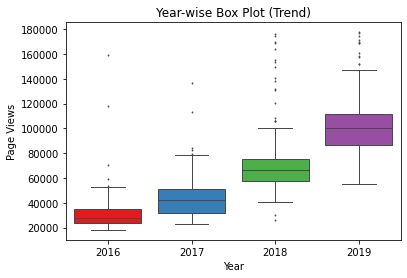

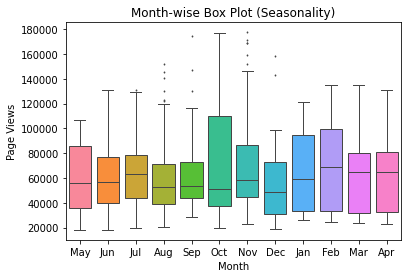

In [5]:
import seaborn as sns

def show_boxplot_yearly_pageviews(df):
  # Draw the box plot
  chart = sns.boxplot(data=df, x='year', y='value', palette=sns.color_palette("Set1"),\
                      linewidth=1, fliersize=1, saturation=5)
  chart.set_ylabel('Page Views')
  chart.set_xlabel('Year')
  chart.set_title('Year-wise Box Plot (Trend)')
  plt.show()
  
  chart2 = sns.boxplot(data=df, x=[m[:3] for m in df['month_name']], \
                       y='value', linewidth=1, fliersize=1, saturation=5)
  chart2.set_ylabel('Page Views')
  chart2.set_xlabel('Month')
  chart2.set_title('Month-wise Box Plot (Seasonality)')
  plt.show()

show_boxplot_yearly_pageviews(df_filtered)

###4.  predict the number of page views in the year 2020 based on the data up to 2019
---

*  perform a linear regression and create a line of best fit 
*  predict the page views in the year 2020, 2025 and 2030 if identified trends persist. 


In [6]:
def get_regression(x, y):
  from scipy.stats import linregress
  # Calculate regression for the variables
  regression = linregress(x,y)
  # Get slope value
  slope = regression.slope
  # Get intercept value
  intercept = regression.intercept
  # Get r value
  r_value = regression.rvalue
  # Get p value
  p_value = regression.pvalue
  # Return and display the values
  return regression, slope, intercept, r_value, p_value

# Create x, y variables
x = df_filtered['year']
y = df_filtered['value']
# Show regression
regr_values, slope, intercept, r_value, p_value =  get_regression(x, y)

display(regr_values)
display(slope)
display(intercept)
display(r_value)

LinregressResult(slope=24385.517311982254, intercept=-49137675.65559689, rvalue=0.7932714276471907, pvalue=1.3395933130147786e-268, stderr=532.3830168399695)

24385.517311982254

-49137675.65559689

0.7932714276471907

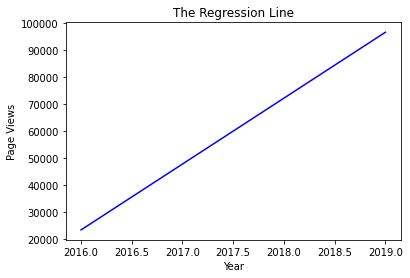

Since there is a strong positive correlation between 
Year and PageViews with r value: 0.7932714276471907, if for example:

the Year increases from 2019 to 2020 
then the number of PageViews are estimated to increase to 121069.31 value.

the Year increases from 2019 to 2025 
then the number of PageViews are estimated to increase to 242996.9 value.

the Year increases from 2019 to 2030 
then the number of PageViews are estimated to increase to 364924.49 value.


In [7]:
# Draw the plot
def show_corr_line_plot(x, slope, intercept, xlabel=None, ylabel=None):
  import matplotlib.pyplot as plt
  # Calculate the y values for the page views
  y = slope*x + intercept
  # Draw the regression line and show the graph
  plt.plot(x, y, color='blue')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title('The Regression Line')
  plt.show()

# Display
show_corr_line_plot(x, slope, intercept, 'Year', 'Page Views')

# Few esimated predictions here
x_max = 2019
x_est = x_max + 1
y_est = round((slope * x_est + intercept), 2)

print(f'Since there is a strong positive correlation between \
\nYear and PageViews with r value: {r_value}, if for example:\n')

print(f'the Year increases from {x_max} to {x_est} \
\nthen the number of PageViews are estimated to increase to {y_est} value.')
print('')
x_est = 2025
y_est = round((slope * x_est + intercept), 2)

print(f'the Year increases from {x_max} to {x_est} \
\nthen the number of PageViews are estimated to increase to {y_est} value.')

print('')
x_est = 2030
y_est = round((slope * x_est + intercept), 2)

print(f'the Year increases from {x_max} to {x_est} \
\nthen the number of PageViews are estimated to increase to {y_est} value.')

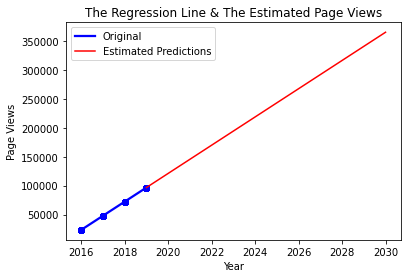

In [8]:
def show_corr_line_extended_splot(x, x_extended_to, slope, intercept, xlabel=None, ylabel=None):
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  y = slope*x + intercept
  # Draw the regression line and show the graph
  chart = sns.regplot(x=x, y=y, color='blue')
  chart.set_xlabel(xlabel)
  chart.set_ylabel(ylabel)
  #plt.plot(x, y, color='blue')
  year = [year for year in range(x[len(x)-1], x_extended_to + 1, 1)]
  page_v = [round((slope * year[i] + intercept), 2) for i in range(0, len(year), 1)]
  #chart2 = sns.regplot(x=year, y=page_v)
  plt.plot(year, page_v, color='red')
  labels = ['Original','Estimated Predictions']
  plt.legend(labels)
  plt.title('The Regression Line & The Estimated Page Views')
  plt.show()

show_corr_line_extended_splot(x, 2030, slope, intercept, 'Year', 'Page Views')

# Reflect

What caused the biggest problems?
How did you solve these problems?